In [1]:
from vmo import VMO
from ibs import *

vmo_dir = "/lustre/home/xuyuxing/Work/Jesse/local_adaptation/1.raw_data/beagle/reseq_landrace_passed_vmo"
vmo = VMO(vmo_dir)
m = vmo.get_matrix()

In [2]:
import timeit
import tracemalloc

bd_time_dict = {}
loop_time_dict = {}

bd_memory_dict = {}
loop_memory_dict = {}

for i in range(10, 2000, 20):
    t = m[:i,:100]

    print("Processing %d samples" % i)  

    # time and measure memory for the broadcasting method
    start_time = timeit.default_timer()
    tracemalloc.start()
    ibs_m = get_IBS_matrix_broadcasting(t)
    end_time = timeit.default_timer()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    execution_time = end_time - start_time
    bd_time_dict[i] = execution_time
    bd_memory_dict[i] = peak

    print("Broadcasting method: Time: %.2f, Memory: %.2f" % (execution_time, peak))

    # time and measure memory for the loop method
    start_time = timeit.default_timer()
    tracemalloc.start()
    ibs_m = get_IBS_matrix_loop(t)
    end_time = timeit.default_timer()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    execution_time = end_time - start_time
    loop_time_dict[i] = execution_time
    loop_memory_dict[i] = peak

    print("Loop method: Time: %.2f, Memory: %.2f" % (execution_time, peak))

Processing 10 samples
Broadcasting method: Time: 0.00, Memory: 2412417.00
Loop method: Time: 0.23, Memory: 389152.00
Processing 30 samples


Broadcasting method: Time: 0.00, Memory: 7225628.00
Loop method: Time: 0.18, Memory: 314515.00
Processing 50 samples
Broadcasting method: Time: 0.01, Memory: 12040640.00
Loop method: Time: 0.21, Memory: 328688.00
Processing 70 samples
Broadcasting method: Time: 0.01, Memory: 16857363.00
Loop method: Time: 0.18, Memory: 344464.00
Processing 90 samples
Broadcasting method: Time: 0.01, Memory: 21676909.00
Loop method: Time: 0.18, Memory: 361339.00
Processing 110 samples
Broadcasting method: Time: 0.02, Memory: 26488640.00
Loop method: Time: 0.21, Memory: 376408.00
Processing 130 samples
Broadcasting method: Time: 0.03, Memory: 31305123.00
Loop method: Time: 0.19, Memory: 392800.00
Processing 150 samples
Broadcasting method: Time: 0.03, Memory: 36121105.00
Loop method: Time: 0.20, Memory: 409339.00
Processing 170 samples
Broadcasting method: Time: 0.03, Memory: 40937105.00
Loop method: Time: 0.19, Memory: 425315.00
Processing 190 samples
Broadcasting method: Time: 0.04, Memory: 45753105.00

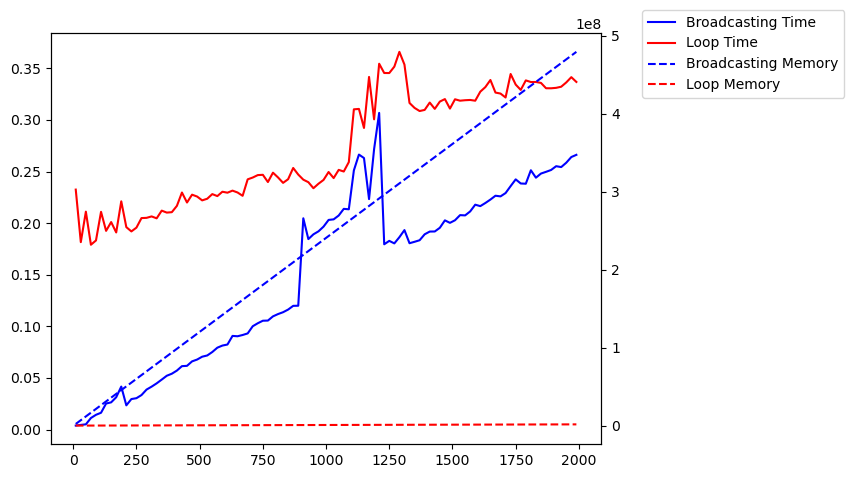

In [3]:
import matplotlib.pyplot as plt

# 创建一个新的图形
fig, ax1 = plt.subplots()

# 创建一个折线图，显示广播方法的时间，使用左边的 y 轴
ax1.plot(list(bd_time_dict.keys()), list(bd_time_dict.values()), 'b-', label='Broadcasting Time')
# 创建一个折线图，显示循环方法的时间，使用左边的 y 轴
ax1.plot(list(loop_time_dict.keys()), list(loop_time_dict.values()), 'r-', label='Loop Time')

# 创建一个共享 x 轴但有不同 y 轴的图形
ax2 = ax1.twinx()
# 创建一个折线图，显示广播方法的内存使用情况，使用右边的 y 轴
ax2.plot(list(bd_memory_dict.keys()), list(bd_memory_dict.values()), 'b--', label='Broadcasting Memory')
# 创建一个折线图，显示循环方法的内存使用情况，使用右边的 y 轴
ax2.plot(list(loop_memory_dict.keys()), list(loop_memory_dict.values()), 'r--', label='Loop Memory')

# 添加图例
fig.legend(loc="upper left", bbox_to_anchor=(1,1))

# 显示图形
plt.tight_layout()
plt.show()

In [2]:
import timeit
import tracemalloc

bd_time_dict = {}
loop_time_dict = {}

bd_memory_dict = {}
loop_memory_dict = {}

for i in range(10, 100000, 5000):
    t = m[:i,:100]

    print("Processing %d samples" % i)  

    # time and measure memory for the broadcasting method
    start_time = timeit.default_timer()
    tracemalloc.start()
    ibs_m = get_IBS_matrix_broadcasting_chunk_parallel(t,100,8)
    end_time = timeit.default_timer()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    execution_time = end_time - start_time
    bd_time_dict[i] = execution_time
    bd_memory_dict[i] = peak

    print("Broadcasting method: Time: %.2f, Memory: %.2f" % (execution_time, peak))

    # time and measure memory for the loop method
    start_time = timeit.default_timer()
    tracemalloc.start()
    ibs_m = get_IBS_matrix_loop_chunk_parallel(t,100,8)
    end_time = timeit.default_timer()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    execution_time = end_time - start_time
    loop_time_dict[i] = execution_time
    loop_memory_dict[i] = peak

    print("Loop method: Time: %.2f, Memory: %.2f" % (execution_time, peak))

Processing 10 samples


Time: 2024-03-22 07:47:00, processed 1/1 chunks, 100.00%
Broadcasting method: Time: 0.52, Memory: 4467750.00
Time: 2024-03-22 07:47:00, processed 1/1 chunks, 100.00%
Loop method: Time: 0.10, Memory: 348051.00
Processing 5010 samples
Time: 2024-03-22 07:47:00, processed 51/51 chunks, 100.00%
Broadcasting method: Time: 0.22, Memory: 8594038.00
Time: 2024-03-22 07:47:01, processed 51/51 chunks, 100.00%
Loop method: Time: 1.06, Memory: 8556786.00
Processing 10010 samples
Time: 2024-03-22 07:47:02, processed 101/101 chunks, 100.00%
Broadcasting method: Time: 0.45, Memory: 16431424.00
Time: 2024-03-22 07:47:04, processed 101/101 chunks, 100.00%
Loop method: Time: 1.78, Memory: 16591894.00
Processing 15010 samples
Time: 2024-03-22 07:47:04, processed 151/151 chunks, 100.00%
Broadcasting method: Time: 0.60, Memory: 24470403.00
Time: 2024-03-22 07:47:07, processed 151/151 chunks, 100.00%
Loop method: Time: 2.53, Memory: 24468098.00
Processing 20010 samples
Time: 2024-03-22 07:47:08, processed 2

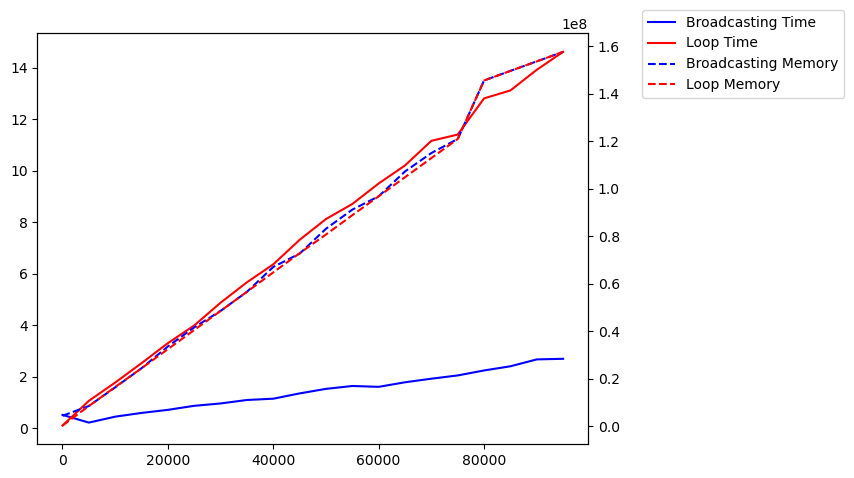

In [3]:
import matplotlib.pyplot as plt

# 创建一个新的图形
fig, ax1 = plt.subplots()

# 创建一个折线图，显示广播方法的时间，使用左边的 y 轴
ax1.plot(list(bd_time_dict.keys()), list(bd_time_dict.values()), 'b-', label='Broadcasting Time')
# 创建一个折线图，显示循环方法的时间，使用左边的 y 轴
ax1.plot(list(loop_time_dict.keys()), list(loop_time_dict.values()), 'r-', label='Loop Time')

# 创建一个共享 x 轴但有不同 y 轴的图形
ax2 = ax1.twinx()
# 创建一个折线图，显示广播方法的内存使用情况，使用右边的 y 轴
ax2.plot(list(bd_memory_dict.keys()), list(bd_memory_dict.values()), 'b--', label='Broadcasting Memory')
# 创建一个折线图，显示循环方法的内存使用情况，使用右边的 y 轴
ax2.plot(list(loop_memory_dict.keys()), list(loop_memory_dict.values()), 'r--', label='Loop Memory')

# 添加图例
fig.legend(loc="upper left", bbox_to_anchor=(1,1))

# 显示图形
plt.tight_layout()
plt.show()

In [4]:
import timeit
import tracemalloc

bd_time_dict = {}
loop_time_dict = {}

bd_memory_dict = {}
loop_memory_dict = {}

for i in range(10, 500000, 5000):
    t = m[:i,:100]

    print("Processing %d samples" % i)  

    # time and measure memory for the broadcasting method
    start_time = timeit.default_timer()
    tracemalloc.start()
    ibs_m = get_IBS_matrix_broadcasting_chunk_parallel(t,200,8)
    end_time = timeit.default_timer()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    execution_time = end_time - start_time
    bd_time_dict[i] = execution_time
    bd_memory_dict[i] = peak

    print("Broadcasting method: Time: %.2f, Memory: %.2f" % (execution_time, peak))

    # time and measure memory for the loop method
    start_time = timeit.default_timer()
    tracemalloc.start()
    ibs_m = get_IBS_matrix_loop_chunk_parallel(t,200,8)
    end_time = timeit.default_timer()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    execution_time = end_time - start_time
    loop_time_dict[i] = execution_time
    loop_memory_dict[i] = peak

    print("Loop method: Time: %.2f, Memory: %.2f" % (execution_time, peak))

Processing 10 samples
Time: 2024-03-22 04:33:15, processed 1/1 chunks, 100.00%
Broadcasting method: Time: 0.01, Memory: 344092.00
Time: 2024-03-22 04:33:15, processed 1/1 chunks, 100.00%
Loop method: Time: 0.01, Memory: 341118.00
Processing 5010 samples
Time: 2024-03-22 04:33:15, processed 26/26 chunks, 100.00%
Broadcasting method: Time: 0.30, Memory: 8186897.00
Time: 2024-03-22 04:33:15, processed 26/26 chunks, 100.00%
Loop method: Time: 0.30, Memory: 8178059.00
Processing 10010 samples
Time: 2024-03-22 04:33:16, processed 51/51 chunks, 100.00%
Broadcasting method: Time: 0.44, Memory: 16175039.00
Time: 2024-03-22 04:33:16, processed 51/51 chunks, 100.00%
Loop method: Time: 0.44, Memory: 16176111.00
Processing 15010 samples
Time: 2024-03-22 04:33:17, processed 76/76 chunks, 100.00%
Broadcasting method: Time: 0.55, Memory: 24175607.00
Time: 2024-03-22 04:33:17, processed 76/76 chunks, 100.00%
Loop method: Time: 0.58, Memory: 24175599.00
Processing 20010 samples
Time: 2024-03-22 04:33:18

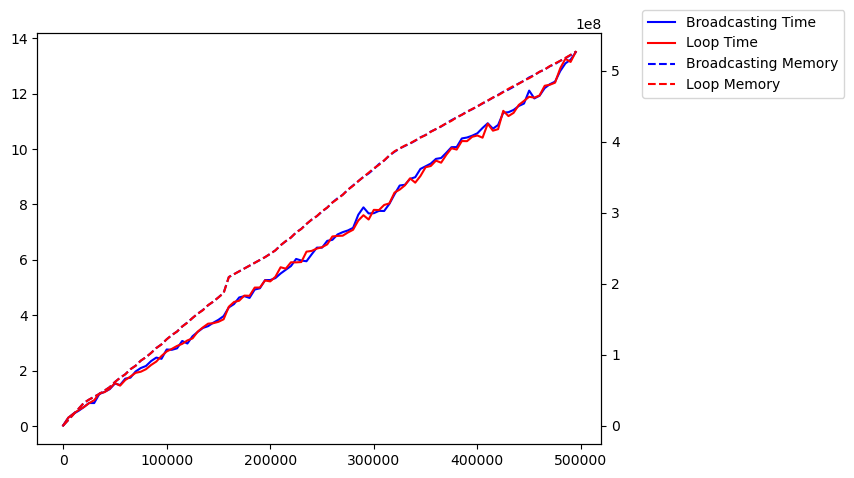

In [5]:
import matplotlib.pyplot as plt

# 创建一个新的图形
fig, ax1 = plt.subplots()

# 创建一个折线图，显示广播方法的时间，使用左边的 y 轴
ax1.plot(list(bd_time_dict.keys()), list(bd_time_dict.values()), 'b-', label='Broadcasting Time')
# 创建一个折线图，显示循环方法的时间，使用左边的 y 轴
ax1.plot(list(loop_time_dict.keys()), list(loop_time_dict.values()), 'r-', label='Loop Time')

# 创建一个共享 x 轴但有不同 y 轴的图形
ax2 = ax1.twinx()
# 创建一个折线图，显示广播方法的内存使用情况，使用右边的 y 轴
ax2.plot(list(bd_memory_dict.keys()), list(bd_memory_dict.values()), 'b--', label='Broadcasting Memory')
# 创建一个折线图，显示循环方法的内存使用情况，使用右边的 y 轴
ax2.plot(list(loop_memory_dict.keys()), list(loop_memory_dict.values()), 'r--', label='Loop Memory')

# 添加图例
fig.legend(loc="upper left", bbox_to_anchor=(1,1))

# 显示图形
plt.tight_layout()
plt.show()

In [6]:
t = m[:100000,:200]

In [4]:
%time ibs_m = get_IBS_matrix_loop(t)
ibs_m

CPU times: user 2.52 s, sys: 61.7 ms, total: 2.58 s
Wall time: 2.59 s


array([[1.     , 0.743  , 0.7204 , ..., 0.6715 , 0.67195, 0.65985],
       [0.743  , 1.     , 0.6636 , ..., 0.65   , 0.64885, 0.66445],
       [0.7204 , 0.6636 , 1.     , ..., 0.634  , 0.88285, 0.65345],
       ...,
       [0.6715 , 0.65   , 0.634  , ..., 1.     , 0.65795, 0.91615],
       [0.67195, 0.64885, 0.88285, ..., 0.65795, 1.     , 0.6789 ],
       [0.65985, 0.66445, 0.65345, ..., 0.91615, 0.6789 , 1.     ]])

In [7]:
%time ibs_m = get_IBS_matrix_dask(t, chunk_size=200, n_jobs=8)
ibs_m

/lustre/home/xuyuxing/Program/miniconda/miniconda3/envs/python39/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40086 instead
  warnings.warn(


/lustre/home/xuyuxing/Program/miniconda/miniconda3/envs/python39/lib/python3.9/site-packages/distributed/client.py:3157: UserWarning: Sending large graph of size 344.34 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
